In [1]:
#loading the libraries
library(timeSeries)
# library(readxl)
library(ggplot2)
library(forecast)
library(tseries)
library(readr)
library(zoo)
library(tidyverse)

Warning message:
“package ‘timeSeries’ was built under R version 4.2.1”
Loading required package: timeDate

Warning message:
“package ‘timeDate’ was built under R version 4.2.2”
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘zoo’


The following object is masked from ‘package:timeSeries’:

    time<-


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 1.0.0

Warning message:
“package ‘forcats’ was built under R version 4.2.2”
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() mask

In [2]:
#What here I am creating a date series which will replace the dates from SARB data, then I check to make sure I have equal obs
dates <- seq(as.Date("2008-01-01"), as.Date("2022-12-31"), by="quarter")
length(dates)

[1] 60

In [3]:
#importing the data and skiping the irrelevant rows
data <- read_csv("/home/mngadil/Downloads/my_Unem_data.csv", show_col_types = FALSE)
length(data$Value)

[1] 60

In [4]:
#joining the synthetic date and Values from SARB data
df <- data.frame(dates,data$Value)

In [5]:
#just to check the data
# head(df)

In [24]:
#this is kind of unnecessary, am renaming variables just for convenience
colnames(df)[colnames(df) == "data.Value"] <- "Rates"
colnames(df)[colnames(df) == "dates"] <- "Dates"

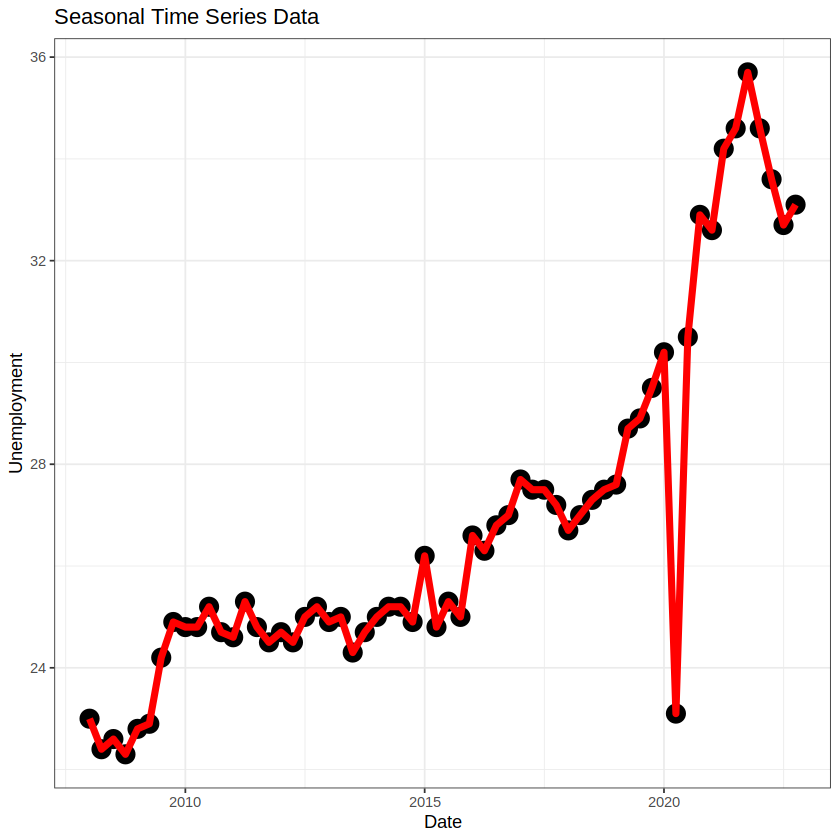

In [7]:

ggplot(df, aes(x = Dates, y = Rates)) +
geom_point(size=5) +  
geom_line(size=2, color="red") +
  labs(x = "Date", y = "Unemployment") +
  ggtitle("Seasonal Time Series Data") + theme_bw()

In [8]:
#from the above plot we can see it is not stationary, so we start differencing

In [9]:
# <- data.frame(Time = data$Time[-1], Value = differenced_data)
dif1 <- diff(df$Rate)
dif_df1 <- data.frame(Date=df$Dates[-1], Rates=dif1)

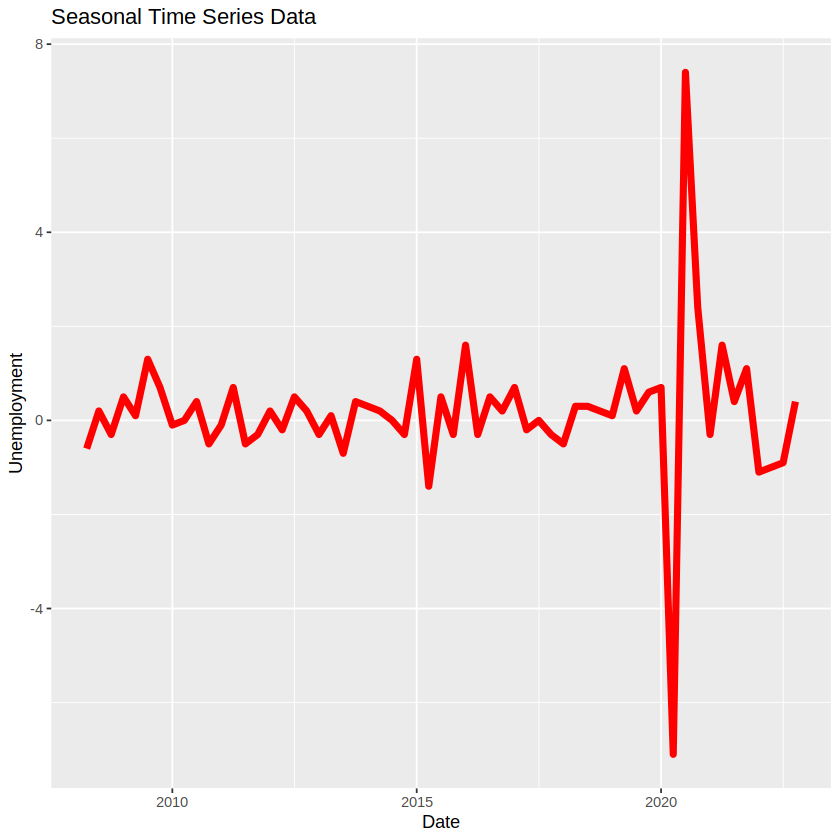

In [10]:
ggplot(dif_df1, aes(x = Date, y = Rates)) + 
geom_line(size=2, color="red") +
  labs(x = "Date", y = "Unemployment") +
  ggtitle("Seasonal Time Series Data")

In [11]:
#adf_test <- adf.test(data$Value)
#kpss_test <- kpss.test(data$Value)
adf_test <- adf.test(dif_df1$Rates)
kpss_test <- kpss.test(dif_df1$Rates)
adf_test
kpss_test

Warning message in adf.test(dif_df1$Rates):
“p-value smaller than printed p-value”
Warning message in kpss.test(dif_df1$Rates):
“p-value greater than printed p-value”



	Augmented Dickey-Fuller Test

data:  dif_df1$Rates
Dickey-Fuller = -4.4808, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary



	KPSS Test for Level Stationarity

data:  dif_df1$Rates
KPSS Level = 0.074912, Truncation lag parameter = 3, p-value = 0.1


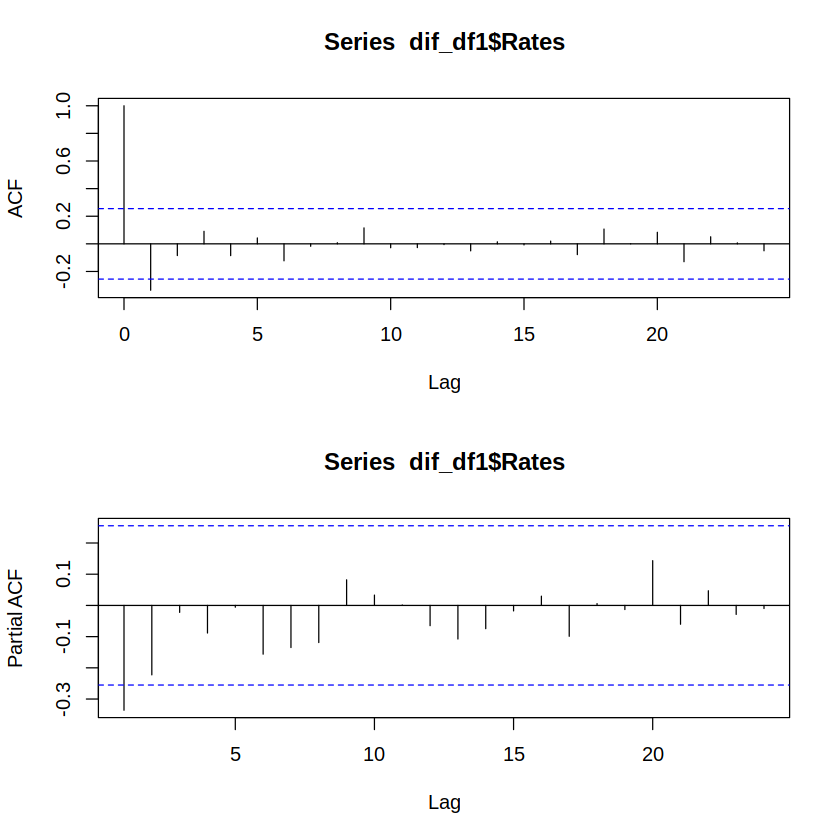

In [12]:
par(mfrow = c(2,1))
acf(dif_df1$Rates, lag.max=24)
pacf(dif_df1$Rates,lag.max = 24)

In [29]:
model1 <- Arima(df$Rates, order=c(1,1,1), seasonal=list(order=c(1,1,1), period=24))
model2 <- Arima(df$Rates, order=c(1,1,1), seasonal=list(order=c(1,1,1), period=12))

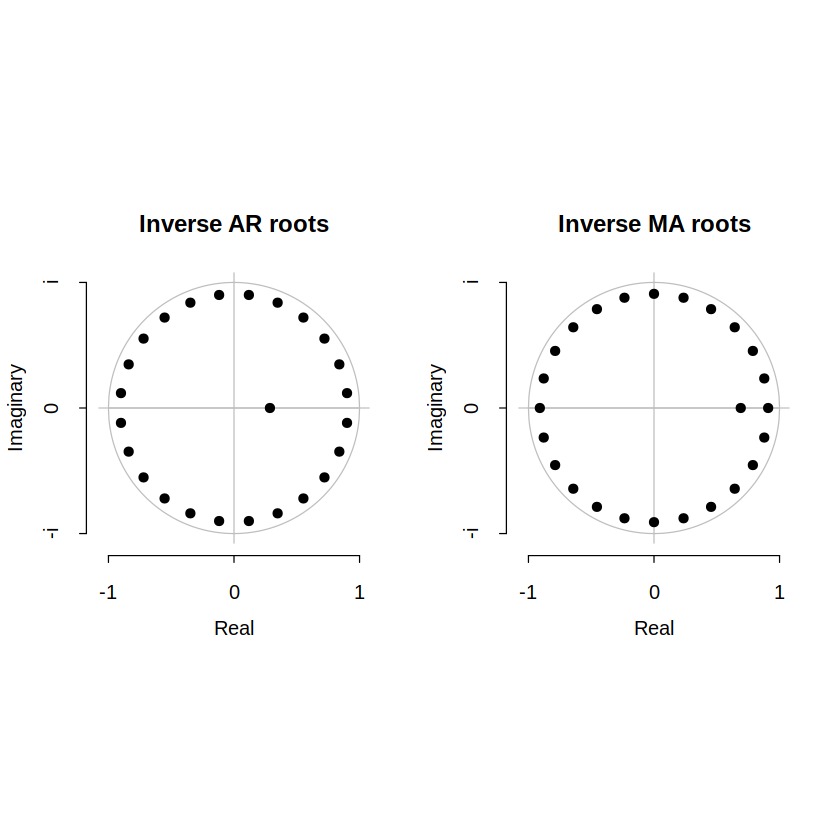

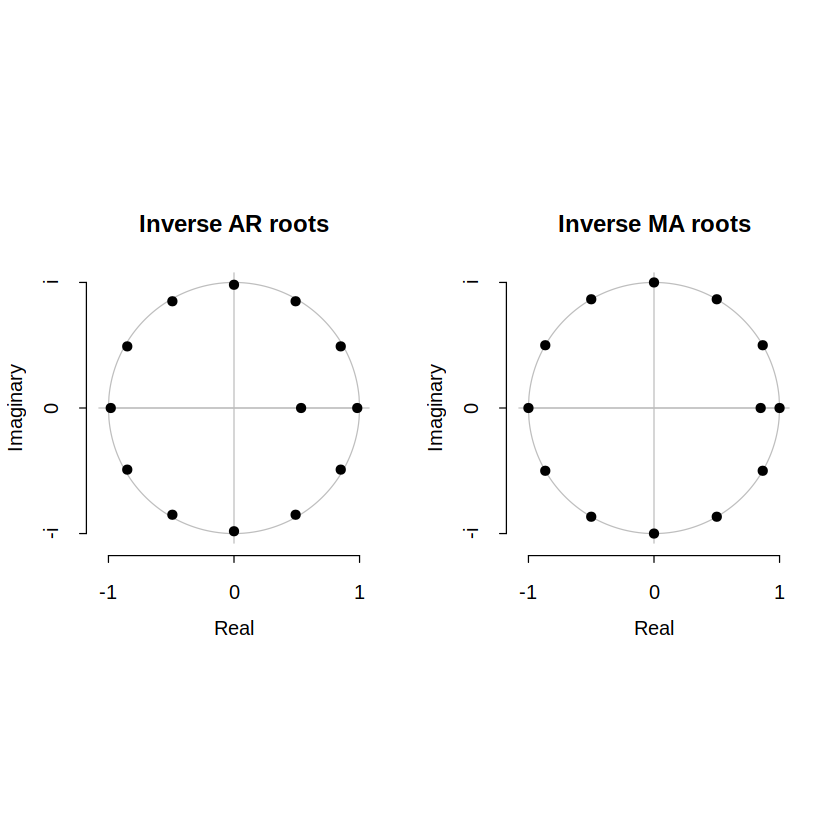

In [30]:
# model <- auto.arima(df$Rates)
par(mfrow = c(2,1))
plot(model1)
plot(model2)

In [31]:
auto_model <- auto.arima(df$Rates)

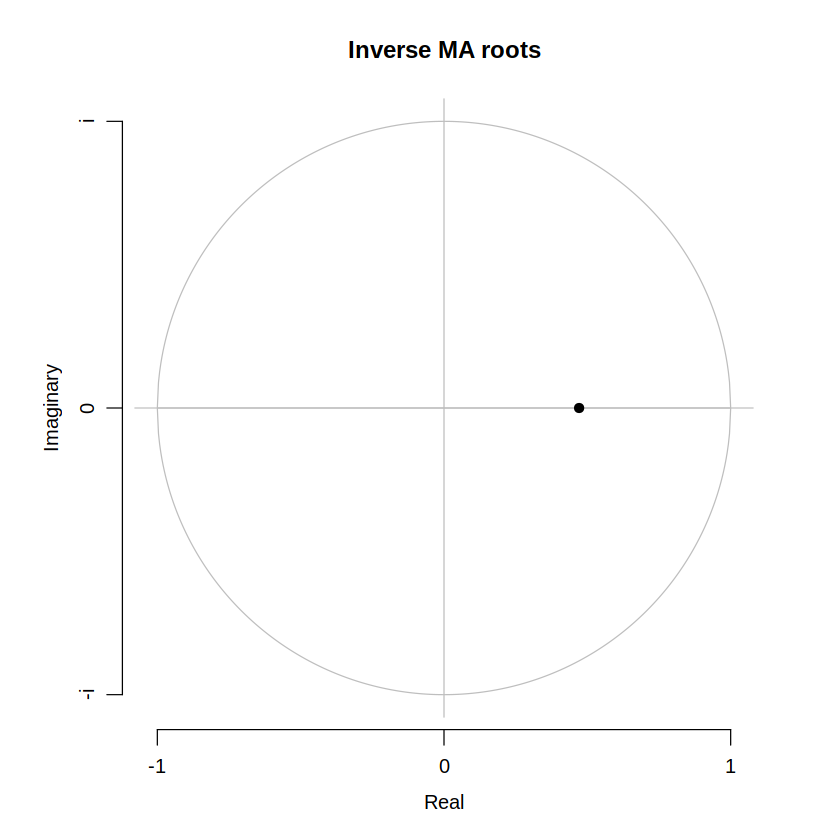

In [32]:
plot(auto_model)

In [37]:
pred1 <- forecast(model1, h=24)
pred2 <- forecast(model1, h=12)

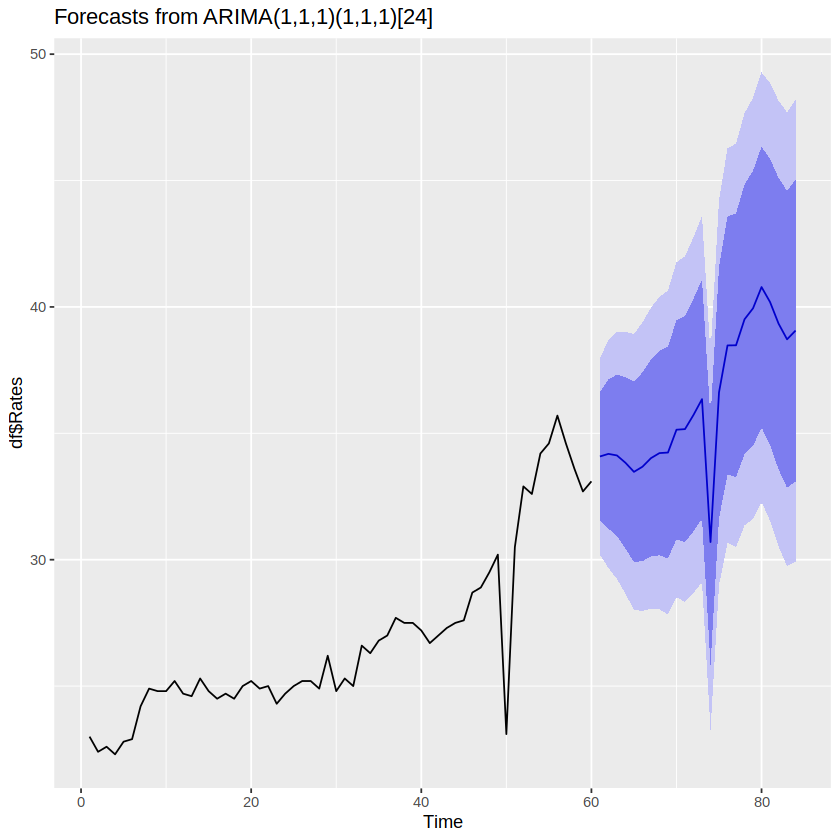

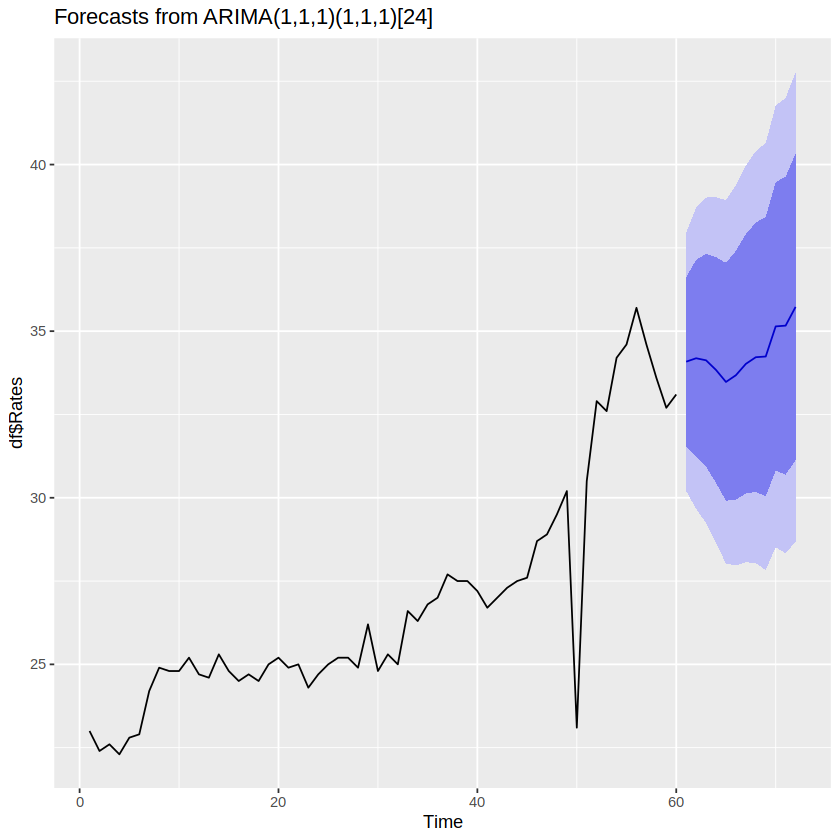

In [40]:
autoplot(pred1)
autoplot(pred2)

In [19]:
model_pred <- forecast(model, h=24)

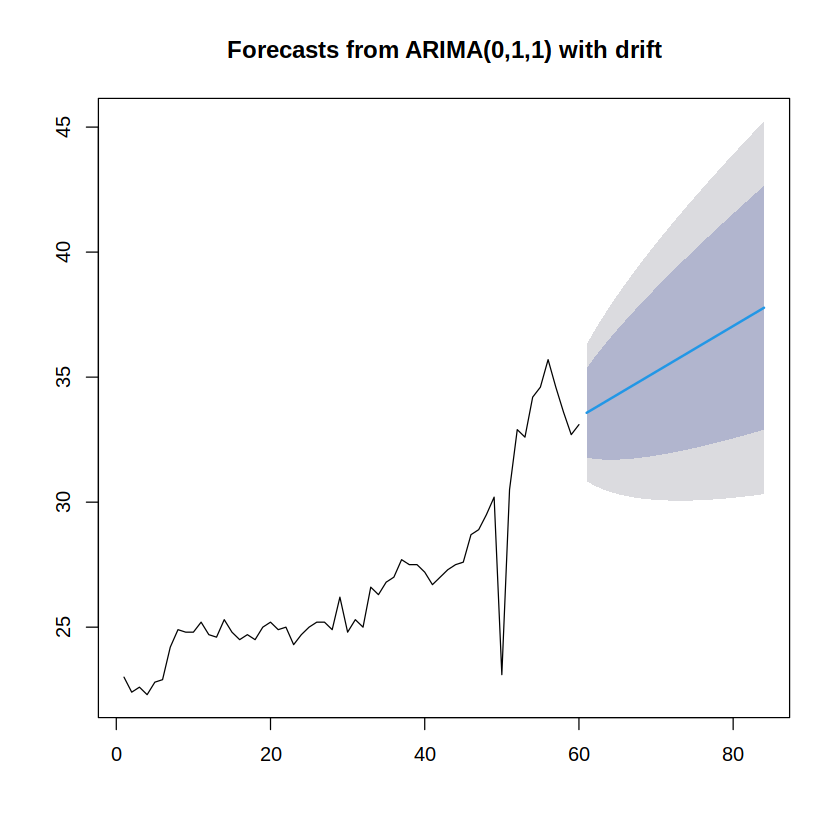

In [20]:
plot(model_pred)